In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
datos = pd.read_csv('events.csv')

C:\Users\Santi\AppData\Roaming\Python\Python36\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
datos_event = datos[datos["event"] == "ad campaign hit"]
datos_event[["person"]].dropna().drop_duplicates()

,person
0,0004b0a2
6,0006a21a
11,000a54b2
99,0019c395
107,001bb7eb
111,001f1653
119,00204059
228,0024a82b
245,0024ad28
259,00269e77


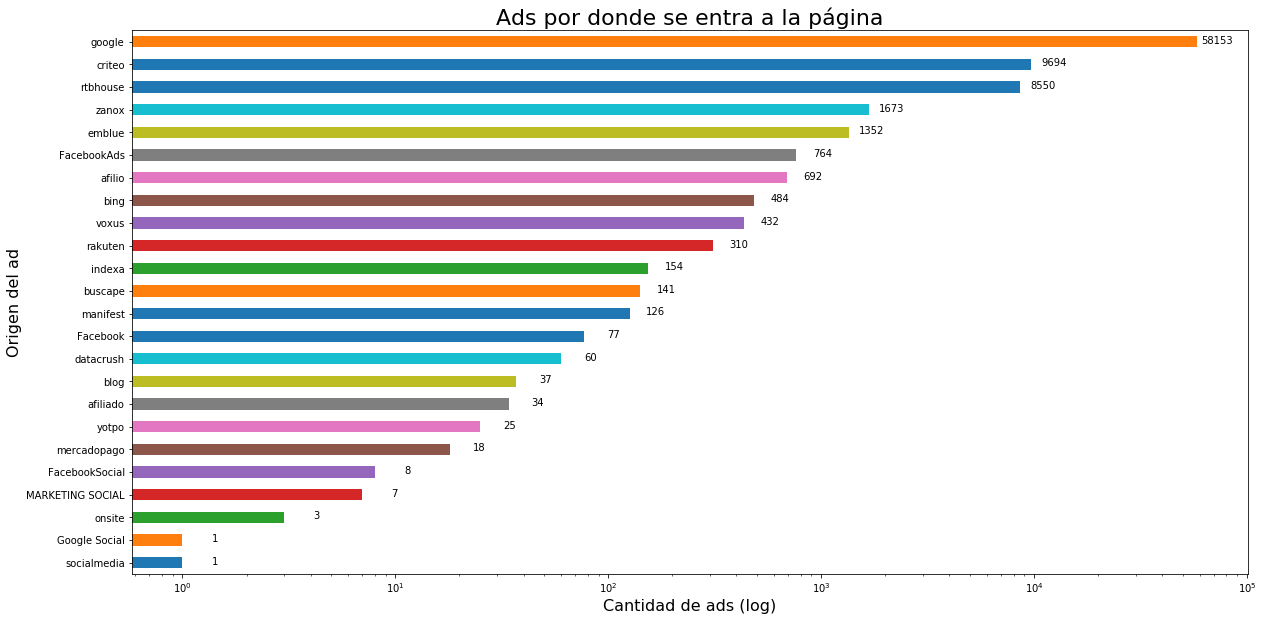

In [6]:
datos_ = datos[["timestamp","person","event","campaign_source"]].dropna().groupby("campaign_source")["event"]

#datos_.apply(lambda x: 100 * x/float(x.sum()))
p = datos_.count().sort_values().plot.barh(width = 0.5, figsize=(20,10))
p.axes.set_xscale("log")
p.set_xlabel("Cantidad de ads (log)", size = 16)
p.set_ylabel("Origen del ad", size = 16)
p.set_title("Ads por donde se entra a la página", size = 22)


for v in p.patches:
    p.annotate(str(int(v.get_width())), (v.get_x() + v.get_width()*1.5, v.get_y()), xytext=(-2, 4), textcoords='offset points', horizontalalignment='right')